# Изучение закономерностей, определяющих успешность игр	

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим, что имеются пропуски в данных, названия столбцов не приведены к нижнему регистру.

Общая информация:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего 16715 строк. Больше всего пропусков данных в столбце `Critic_Score`. Также видим, что тип данных в столбце `Year_of_Release` не `datetime64`, а в столбце `User_Score` - не `float64`.

Построим гистограммы:

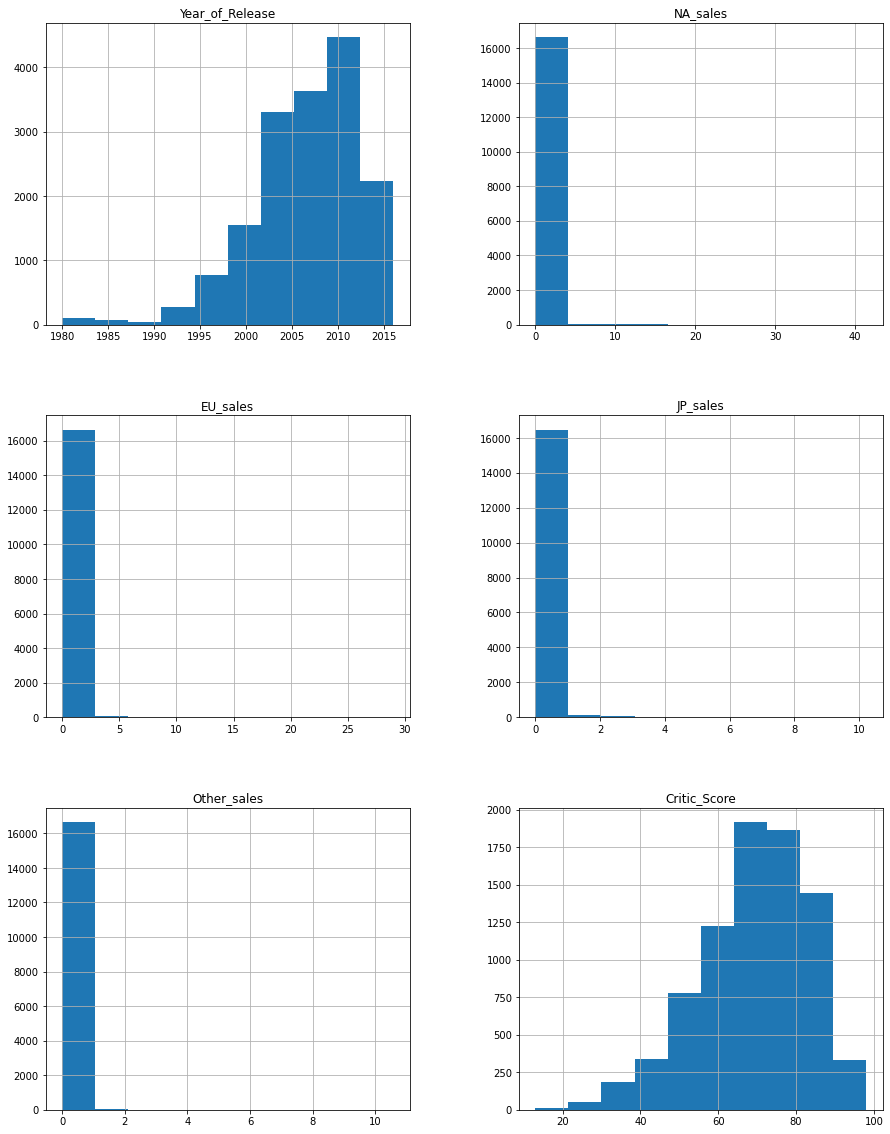

In [5]:
data.hist(figsize=(15, 20));

Из графиков видим, что для большинства игр дата релиза была в ~2010 году, оценка критиков от 70% до 80%. В данных по продажам имеются аномалии. График по `User_score` не построен из-за неправильного типа данных.

__Вывод:__ изучили общую информацию. Увидели, что в данных имеются пропуски и аномалии. Названия столбцов не приведены к нижнему регистру. Тип данных в столбце `Year_of_Release` не `datetime64`, а в столбце `User_Score` - не `float64`.

### Шаг 2. Предобработка данных

#### Изменение названия столбцов

Приведем название столбцов к нижнему регистру.

In [6]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', \
                'eu_sales', 'jp_sales', 'other_sales', 'critic_score', \
                'user_score', 'rating']

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__Вывод:__ привели названия столбцов к нижнему регистру.

#### Изменение типов данных

Изменим тип данных в столбце `year_of_release` c `float64` на `int`, но сначала посмотрим есть ли пропуски.

In [8]:
data['year_of_release'].isna().sum()

269

По заданию необходимо запланировать кампанию на 2017-й год, поэтому пропуски в столбце `year_of_release` могут повлиять на результат. Количество пропусков невелико (1.6%), восполнить их нечем, поэтому удалим их.

In [9]:
data = data.dropna(subset=['year_of_release'])

#проверим пропуски
data['year_of_release'].isna().sum()

0

In [10]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].astype('int')

В столбце `user_score` нужно изметь тип данных на `float64`. Рассмотрим уникальные значения в столбце.

In [11]:
display(data['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что кроме значений рейтинга (`float` и `NaN`) имеется значение `tbd`, что означает "to be determined" - будет определено, значит рейтинг на момент получения данных еще не был выставлен по причине малого количество отзывов (при этом игра уже была выпущена). Для нас это значение не имеет практического смысла, поэтому для изменения типа столбца на `float` заменим `tbd` на `NaN`. Иначе из-за строки `tbd` будет ошибка при изменении типа данных.

In [12]:
#data[data['user_score'] == "tbd"] = np.nan
data['user_score'] = data['user_score'].replace('tbd', np.nan)
display(data['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

И поменяем тип данных в `user_score`.

In [14]:
data['user_score'] = data['user_score'].astype('float64')

#### Исследование и заполнение пропусков в данных

Найдем и изучим пропущенные значения в столбцах:

In [16]:
display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm'))

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.500000
user_score,54.600000


Ранее мы удалили пропуски в `year_of_release`. Пропуски остались в трех столбцах: `critic_score`, `user_score`, `rating`.

Причины, которые могли привести к пропускам в данных:
- данных могло не оказаться в открытых источниках;
- игра была выпущена до основания ESRB в 1994 году;
- игра была выпущена до основания сайтов с оценками критиков и пользователей;
- технические проблемы при копировании/перемещении данных.

Рассмотрим пропуски подробнее.

In [20]:
print(f'Пропуски в "critic_score": {data.critic_score.isna().sum()}')
print(f'Пропуски в "user_score": {data.user_score.isna().sum()}')
print(f'Пропуски в "rating": {data.rating.isna().sum()}')

Пропуски в "critic_score": 8463
Пропуски в "user_score": 8983
Пропуски в "rating": 6678


Не будем спешить избавляться от пропусков в столбцах `critic_score` (51,5%), `user_score` (40.2%), `rating` (40.6%), т.к. замена на синтетические данные или удаление может сильно исказить картину.

Проверим нет ли явных дубликатов в данных.

In [22]:
display(data.duplicated().sum())

0

Проверим неявные дубликаты в столбце `name`. Приведем названия игр к нижнему регистру.

In [23]:
data['name'] = data['name'].str.lower()

Название игры может повторяться для разных платформ и году релиза. Поэтому проведем проверку по имени, платформе и году релиза одновременно.

In [24]:
data[['name', 'year_of_release', 'platform']].duplicated().sum()

2

Обнаружено два дубликата, удалим их.

In [25]:
data[['name', 'year_of_release', 'platform']] = \
data[['name', 'year_of_release', 'platform']].drop_duplicates()

#### Обработка и удаление аномалий (редких значений)

Найдем и устраним редкие и выбивающиеся значения.

Из графиков видим, что аномалии имеются в столбцах `na_sales`, `eu_sales`, `jp_sales`, `other_sales`. Рассмотрим их подробнее на наличие выбросов.

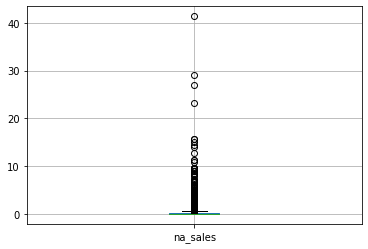

count    16446.000
mean         0.264
std          0.818
min          0.000
25%          0.000
50%          0.080
75%          0.240
max         41.360
Name: na_sales, dtype: float64

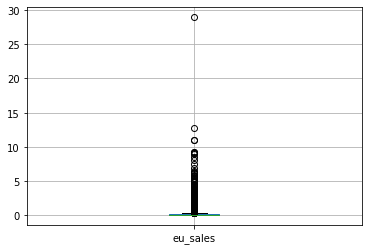

count    16446.000
mean         0.146
std          0.507
min          0.000
25%          0.000
50%          0.020
75%          0.110
max         28.960
Name: eu_sales, dtype: float64

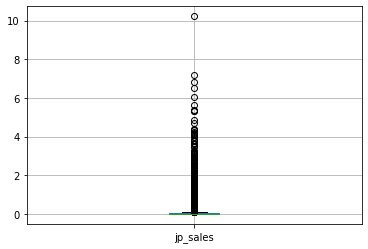

count    16446.000
mean         0.078
std          0.311
min          0.000
25%          0.000
50%          0.000
75%          0.040
max         10.220
Name: jp_sales, dtype: float64

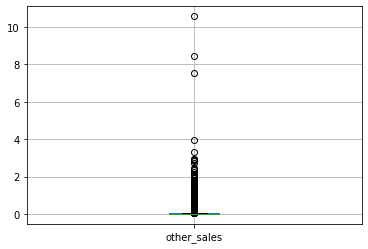

count    16446.000
mean         0.048
std          0.188
min          0.000
25%          0.000
50%          0.010
75%          0.030
max         10.570
Name: other_sales, dtype: float64

In [26]:
columns_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for col in columns_list:
    data.boxplot(column=col)
    plt.show()
    display(round(data[col].describe(), 3))

Медианное значение продаж игр в регионах оценивается в десятках тысячах копий, тогда как игры-бестселлеры продаются в десятках миллионов копий (разница на три порядка). Эти продажи нельзя считать выбросами.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [27]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

__Вывод:__ оставили пропуски в данных для столбцов `critic_score`, `user_score`, `rating`, т.к. удалив их мы потеряем до половины данных, а заменив на синтетические данные можем сильно исказить картину (адекватно восполнить эти данные нечем). Провели проверку на явные (отсутствуют) и неявные дубликаты (удалили). Посмотрели на аномальные значения в продажах, выбросы отсутствуют. Посчитали суммарные продажи во всех регионах и добавили их в отдельный столбец `total_sales`.

In [28]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16446 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!' nan]
name 

### Шаг 3. Исследовательский анализ данных

#### Посмотрим сколько игр выпускалось в разные годы.

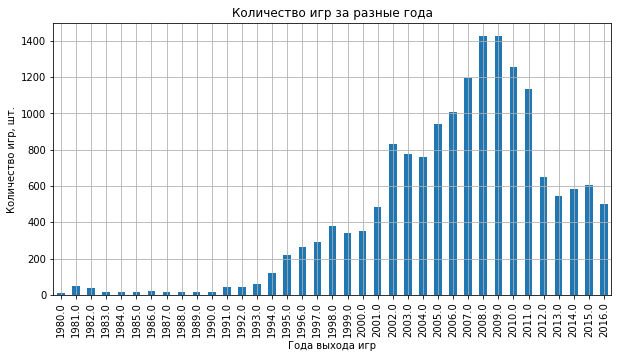

In [29]:
data\
.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(grid=True, figsize=(10, 5), kind='bar', legend = None)

plt.title('Количество игр за разные года')
plt.xlabel("Года выхода игр")
plt.ylabel("Количество игр, шт.")
plt.show()

__Вывод:__ на графике посмотрели количество выпускаемых игр по годам. Рост количества игр начался с 1994 года с пиком в 2008 году. Пик можно объяснить тем, что это переходный период, когда уже прошло пара лет с выхода следующего поколения приставок (PS3, Xbox360), но и предыдущее поколение (PS2, XBox) имеет все еще большую аудиторию.

#### Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами.

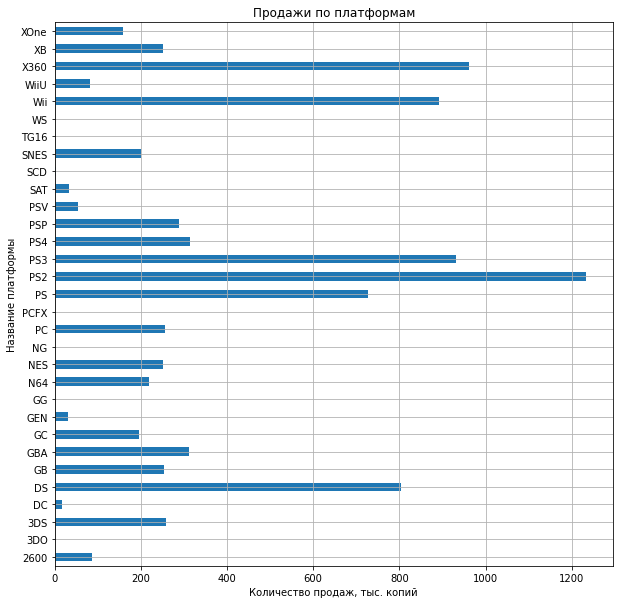

In [30]:
data\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.plot(grid=True, figsize=(10, 10), kind='barh', legend = None)

plt.title('Продажи по платформам')
plt.xlabel("Количество продаж, тыс. копий")
plt.ylabel("Название платформы")
plt.show()

In [31]:
top_platforms = list(data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).index[:5])
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Платформы с наибольшими суммарными продажами: PS2, X360, PS3, PS, Wii.

Построим распределения по годам.

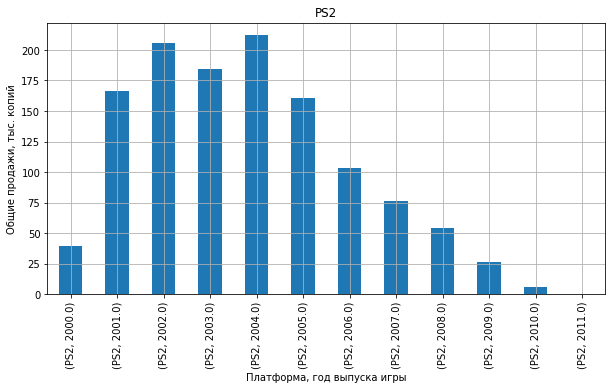

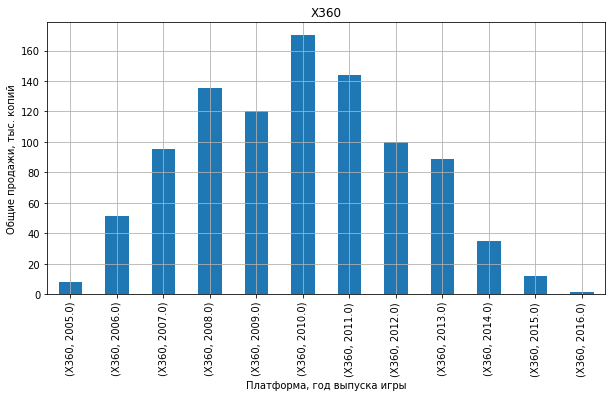

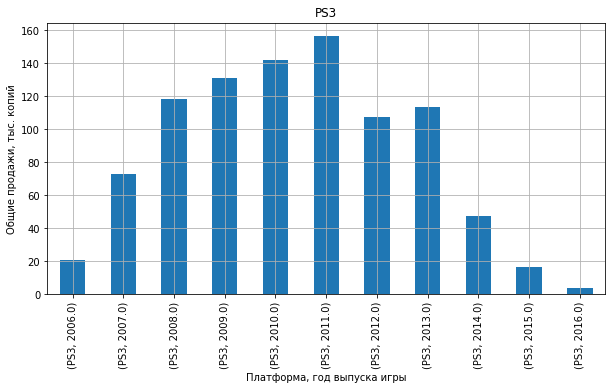

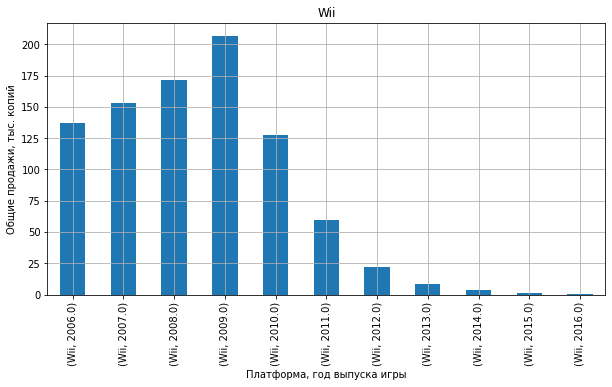

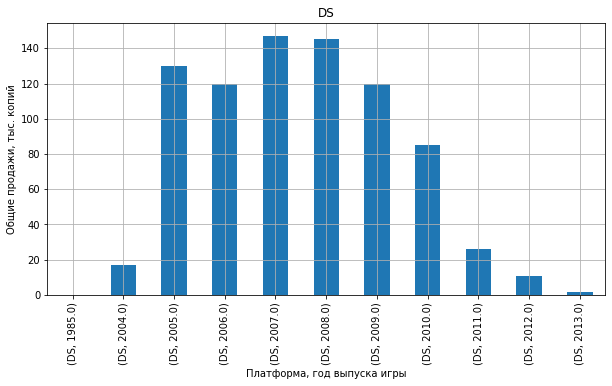

In [33]:
for i in top_platforms:
    data\
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')\
    .query('platform == @i')\
    .plot(grid=True, figsize=(10, 5), kind='bar', title=i, xlabel='Платформа, год выпуска игры', ylabel='Общие продажи, тыс. копий', legend = None)

__Вывод:__ построили график продаж по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределения по годам. Жизненный цикл платформы составляет от 10 до 12 лет. При этом два поколения могут параллельно продаваться сроком от 4 лет (PS, PS2) до 6 лет (PS2, PS3).

Старт продаж новой платформы обычно начинается перед Рождеством (для увеличения ажиотажа), поэтому на графиках мы видим небольшой первый год и увеличение продаж в последующие годы.

Все представленные платформы уже завершили свой жизненный цикл.

#### Возьмем данные за соответствующий актуальный период

Для анализа данных нам не нужны данные за все периоды, а только те года, которые помогут построить прогноз на 2017 год. Посмотрим какие платформы актуальны в 2016 году.

In [34]:
data.query('year_of_release == 2016')['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

Из распределений с наибольшими суммарными продажами по годам видим, что для прошлого поколения платформ X360, PS3 жизненный цикл подошел к концу.

Актуальные поколения платформ PS4 и Xbox One вышли в конце 2013 года, поэтому для анализа будем использовать данные с 2012 года, чтобы увидеть динамику изменения продаж по другим платформам.

In [35]:
actual_data = data.query('year_of_release >= 2012')

__Вывод:__ определили актуальный период с 2012 по 2016 годы, который поможет построить прогноз на 2017 год. Записали датафрейм с актуальными данными `actual_data`.

#### Выберем несколько потенциально прибыльных платформ

Посмотрим график продаж по платформам для актуальных данных.

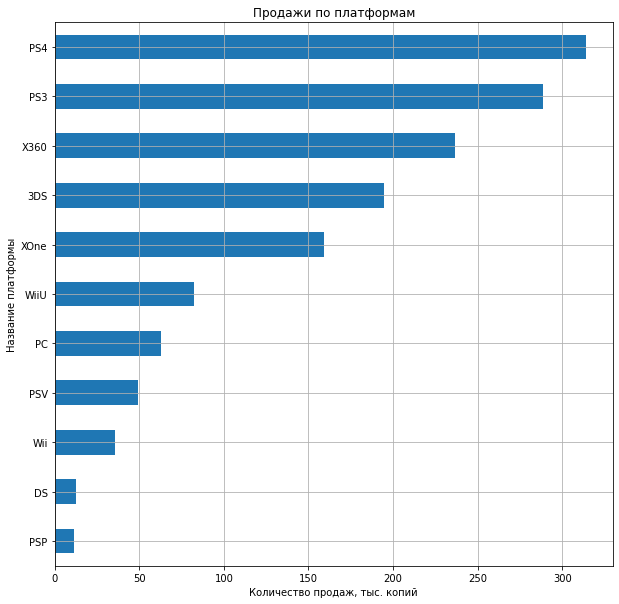

In [36]:
actual_data\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=True)\
.plot(grid=True, figsize=(10, 10), kind='barh', legend = None)

plt.title('Продажи по платформам')
plt.xlabel("Количество продаж, тыс. копий")
plt.ylabel("Название платформы")
plt.show()

In [37]:
platforms = list(actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).index[:8])
platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']

По каждой платформе построим распределения с наибольшими суммарными продажами по годам.

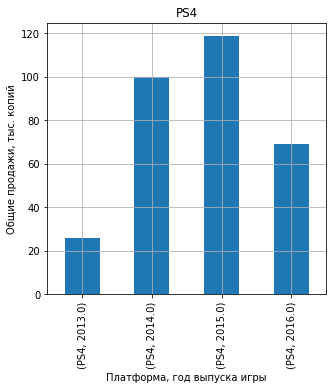

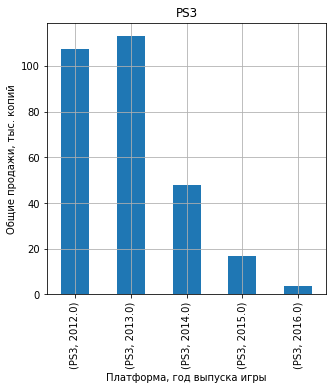

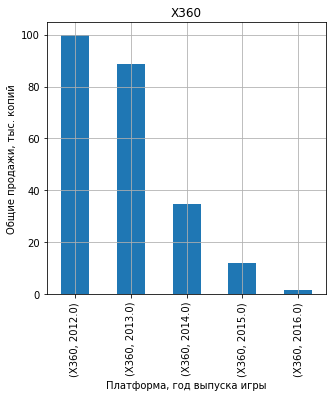

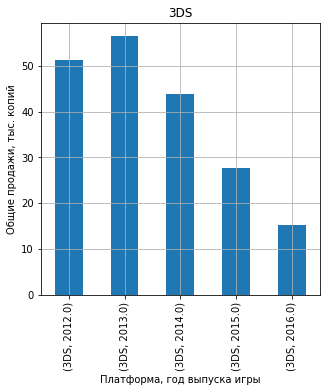

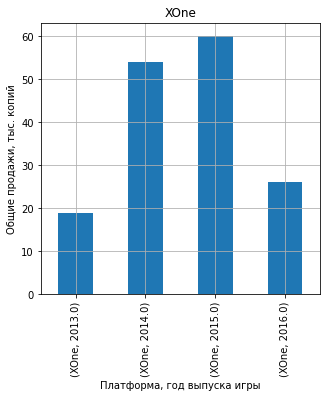

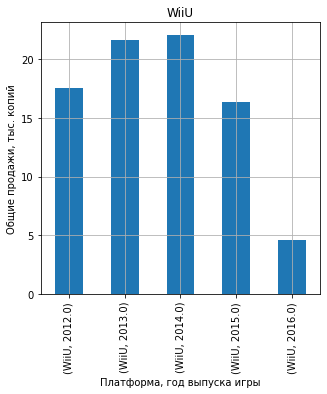

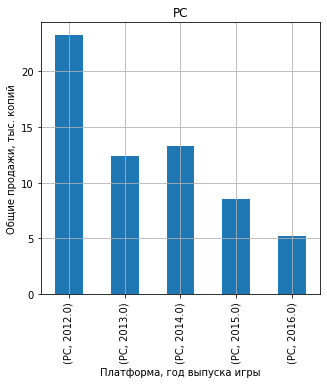

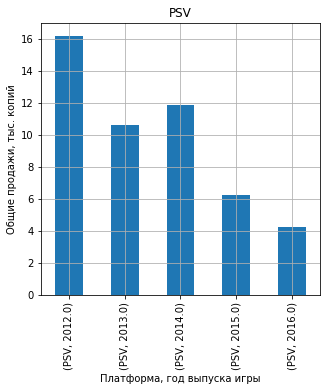

In [38]:
for i in platforms:
    actual_data\
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')\
    .query('platform == @i')\
    .plot(grid=True, figsize=(5, 5), kind='bar', title=i, xlabel='Платформа, год выпуска игры', ylabel='Общие продажи, тыс. копий', legend = None)

По заданию мы находимся в декабре 2016 года, а значит данных по продажам за 4 квартал (самый прибыльный квартал из-за новогодних праздников) точно нет, возможно и за 3 квартал получены не все данные. Графики это подтверждают: данные за 2016 год не полные.

Лидируют платформы: `PS4`, `PS3`, `X360`, `3DS`, `XOne`, растут: `PS4`, `XOne`, падают: `3DS`, `PS3`, `WiiU`, `X360`, `PSV`, `PC`.

Выберем потенциально прибыльных платформ: `PS4`, `XOne`, `3DS`, `PS3`, `WiiU`.

__Вывод:__ построили график продаж по платформам для актуальных данных. По каждой платформе с наибольшими продажами построили распределения с суммарными продажами по годам. По графикам выбрали потенциально прибыльные платформы: `PS4`, `XOne`, `3DS`, `PS3`, `WiiU`.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [40]:
platforms = list(actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).index[:])
for col in platforms:
    print(f'Платформа {col}:')
    display(round(actual_data.query('platform == @col')['total_sales'].describe(), 3))

Платформа PS4:


count    392.000
mean       0.801
std        1.609
min        0.010
25%        0.060
50%        0.200
75%        0.730
max       14.630
Name: total_sales, dtype: float64

Платформа PS3:


count    492.000
mean       0.587
std        1.464
min        0.010
25%        0.050
50%        0.200
75%        0.610
max       21.050
Name: total_sales, dtype: float64

Платформа X360:


count    292.000
mean       0.810
std        1.712
min        0.010
25%        0.100
50%        0.310
75%        0.870
max       16.270
Name: total_sales, dtype: float64

Платформа 3DS:


count    396.000
mean       0.491
std        1.387
min        0.010
25%        0.040
50%        0.110
75%        0.313
max       14.600
Name: total_sales, dtype: float64

Платформа XOne:


count    247.000
mean       0.645
std        1.036
min        0.010
25%        0.060
50%        0.220
75%        0.685
max        7.390
Name: total_sales, dtype: float64

Платформа WiiU:


count    147.000
mean       0.559
std        1.059
min        0.010
25%        0.080
50%        0.220
75%        0.525
max        7.090
Name: total_sales, dtype: float64

Платформа PC:


count    250.000
mean       0.251
std        0.495
min        0.010
25%        0.030
50%        0.080
75%        0.240
max        5.140
Name: total_sales, dtype: float64

Платформа PSV:


count    411.000
mean       0.120
std        0.203
min        0.010
25%        0.020
50%        0.050
75%        0.120
max        1.960
Name: total_sales, dtype: float64

Платформа Wii:


count    54.000
mean      0.655
std       1.165
min       0.010
25%       0.062
50%       0.180
75%       0.688
max       6.760
Name: total_sales, dtype: float64

Платформа DS:


count    31.000
mean      0.405
std       1.439
min       0.010
25%       0.020
50%       0.050
75%       0.185
max       8.060
Name: total_sales, dtype: float64

Платформа PSP:


count    173.000
mean       0.065
std        0.071
min        0.010
25%        0.020
50%        0.030
75%        0.090
max        0.360
Name: total_sales, dtype: float64

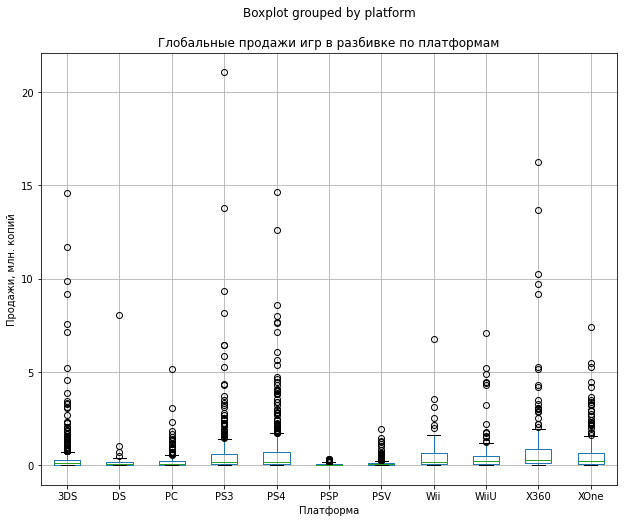

In [41]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(10, 8))
plt.title(f"Глобальные продажи игр в разбивке по платформам")
plt.ylabel("Продажи, млн. копий")
plt.xlabel("Платформа")
plt.show()

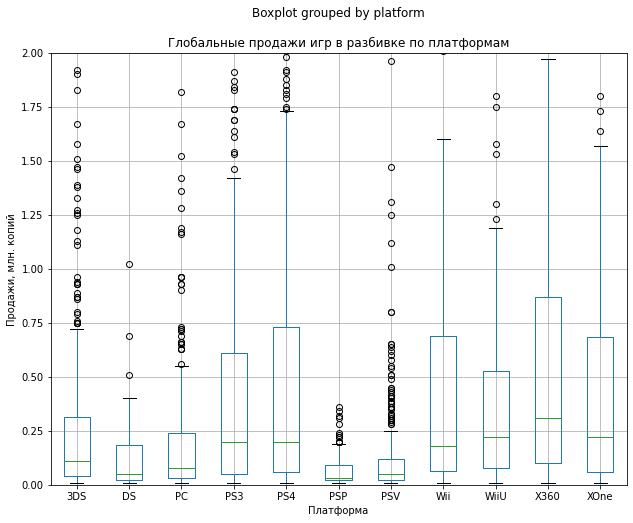

In [42]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(10, 8))
plt.title(f"Глобальные продажи игр в разбивке по платформам")
plt.ylabel("Продажи, млн. копий")
plt.xlabel("Платформа")
plt.ylim((0, 2))
plt.show()

__Вывод:__ построили график "ящик с усами" по глобальным продажам игр в разбивке по платформам:
- по `PS4` видим, что максимальные продажи игры составили 14.63 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 60 тыс. до 730 тыс. копий, медианное значение - 200 тыс. копий.
- по `PS3` видим, что максимальные продажи игры составили 21.05 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 50 тыс. до 610 тыс. копий, медианное значение - 200 тыс. копий.
- по `X360` видим, что максимальные продажи игры составили 16.27 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 100 тыс. до 870 тыс. копий, медианное значение - 310 тыс. копий.
- по `3DS` видим, что максимальные продажи игры составили 14.6 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 40 тыс. до 313 тыс. копий, медианное значение - 110 тыс. копий.
- по `XOne` видим, что максимальные продажи игры составили 7.39 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 60 тыс. до 685 тыс. копий, медианное значение - 220 тыс. копий.
- по `WiiU` видим, что максимальные продажи игры составили 7.09 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 80 тыс. до 525 тыс. копий, медианное значение - 220 тыс. копий.
- по `PC` видим, что максимальные продажи игры составили 5.14 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 30 тыс. до 240 тыс. копий, медианное значение - 80 тыс. копий.
- по `PSV` видим, что максимальные продажи игры составили 1.96 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 20 тыс. до 120 тыс. копий, медианное значение - 50 тыс. копий.
- по `Wii` видим, что максимальные продажи игры составили 6.76 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 62 тыс. до 688 тыс. копий, медианное значение - 180 тыс. копий.
- по `DS` видим, что максимальные продажи игры составили 8.06 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 20 тыс. до 185 тыс. копий, медианное значение - 50 тыс. копий.
- по `PSP` видим, что максимальные продажи игры составили 360 тыс. копий, минимальные - 10 тыс. копий, в основном игры продаются в диапазоне от 20 тыс. до 90 тыс. копий, медианное значение - 30 тыс. копий.

Диапазон продаж игр для выбранных потенциально прибыльных платформ находится на примерно одном уровне, за исключением 3DS: от 40 тыс. до 313 тыс. копий. У 3DS показатели ниже, можем предположить в связи с тем, что это портативная приставка.

Максимальные продажи обеспечивают кроссплатформенные игры-бестселлеры и игры-эксклюзивы платформ, ради которых пользователи и выбирают эту платформу. Лидер продаж - `PS3`, но время `PS4` еще впереди.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Самой популярной платформой является PS3, несмотря на то, что ее время подходит к концу, рассмотрим для нее корреляции между продажами и отзывами пользователей и критиков.

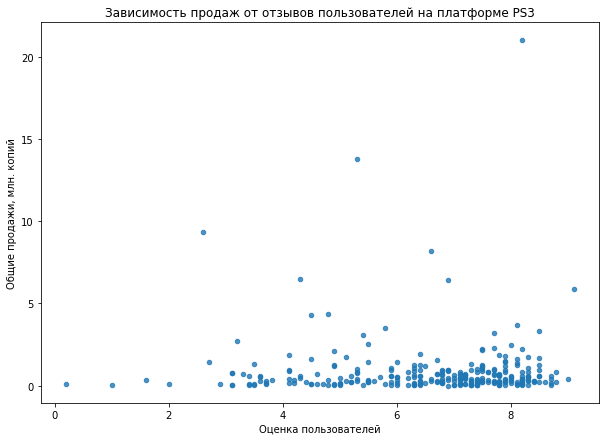

Коэффициент Пирсона: -0.006205767686051523


In [44]:
actual_data.query('platform == "PS3"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8, figsize=(10, 7));
plt.title("Зависимость продаж от отзывов пользователей на платформе PS3")
plt.ylabel("Общие продажи, млн. копий")
plt.xlabel("Оценка пользователей")
plt.show()
print('Коэффициент Пирсона:', actual_data.query('platform == "PS3"')['user_score'].corr(actual_data.query('platform == "PS3"')['total_sales']))

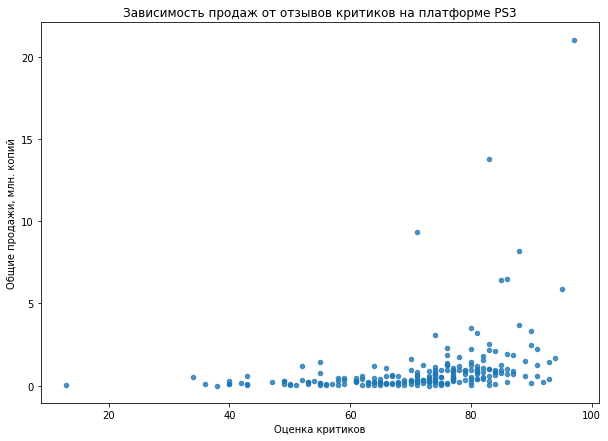

Коэффициент Пирсона: 0.3341517575509856


In [45]:
actual_data.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8, figsize=(10, 7));
plt.title("Зависимость продаж от отзывов критиков на платформе PS3")
plt.ylabel("Общие продажи, млн. копий")
plt.xlabel("Оценка критиков")
plt.show()
print('Коэффициент Пирсона:', actual_data.query('platform == "PS3"')['critic_score'].corr(actual_data.query('platform == "PS3"')['total_sales']))

__Вывод:__ на диаграмме рассеяния видим небольшую прямую корреляцию зависимости общих продаж от отзывов критиков, коэффициент Пирсона составляет 0.33. Зависимости общих продаж от отзывов пользователей практически нет, коэффициент Пирсона составляет -0.005.

Можно сделать вывод, что критики наиболее точно оценивают игры, что подтверждается увеличением продаж.

#### Соотнесем выводы с продажами игр на других платформах

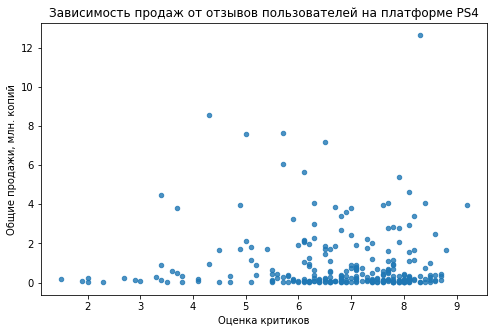

Коэффициент Пирсона: -0.031957110204556376


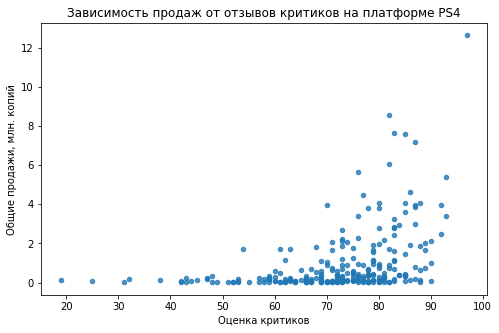

Коэффициент Пирсона: 0.40656790206178095



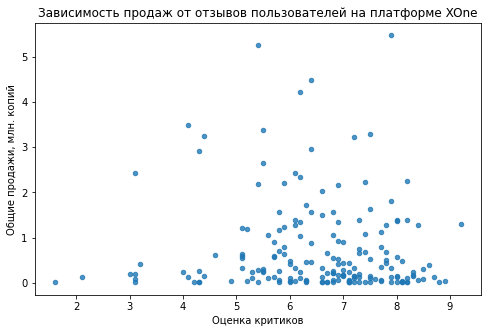

Коэффициент Пирсона: -0.06892505328279414


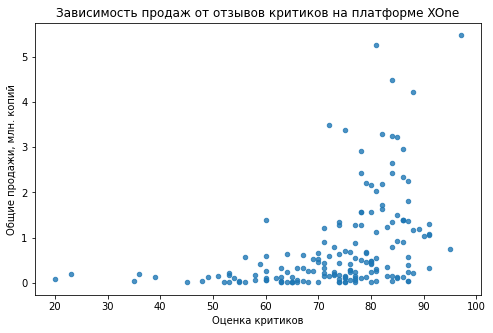

Коэффициент Пирсона: 0.4169983280084017



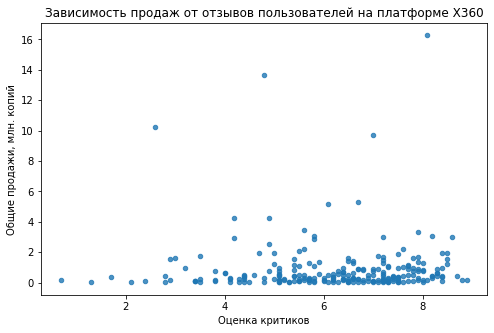

Коэффициент Пирсона: 0.006163978646213326


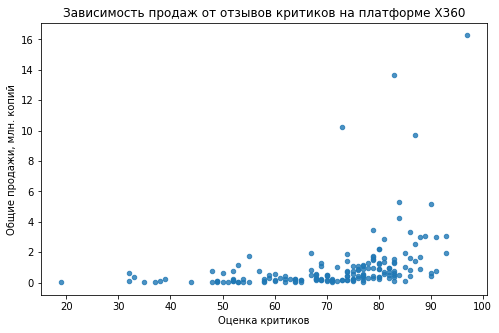

Коэффициент Пирсона: 0.3605734888507336



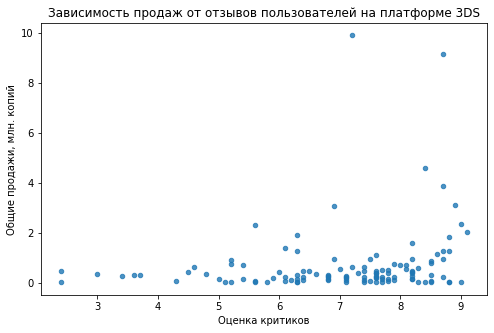

Коэффициент Пирсона: 0.19758263411038599


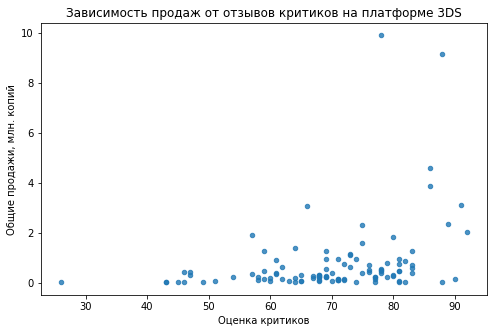

Коэффициент Пирсона: 0.3208028695360785



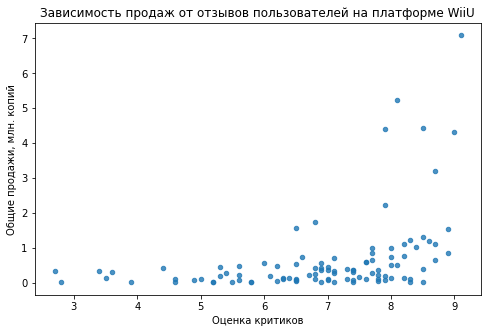

Коэффициент Пирсона: 0.4002190202148617


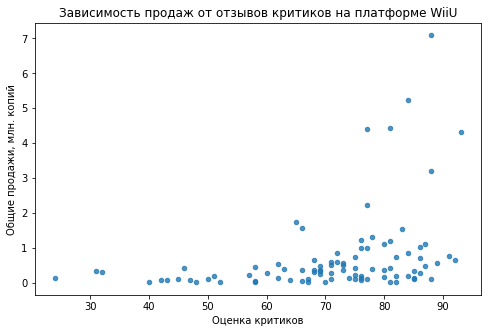

Коэффициент Пирсона: 0.34837976012017485



In [46]:
columns_list = ['PS4', 'XOne', 'X360', '3DS', 'WiiU']
for col in columns_list:
    actual_data.query('platform == @col').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8, figsize=(8, 5));
    plt.title(f"Зависимость продаж от отзывов пользователей на платформе {col}")
    plt.ylabel("Общие продажи, млн. копий")
    plt.xlabel("Оценка критиков")
    plt.show()
    print('Коэффициент Пирсона:', actual_data.query('platform == @col')['user_score'].corr(actual_data.query('platform == @col')['total_sales']))
    actual_data.query('platform == @col').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8, figsize=(8, 5));
    plt.title(f"Зависимость продаж от отзывов критиков на платформе {col}")
    plt.ylabel("Общие продажи, млн. копий")
    plt.xlabel("Оценка критиков")
    plt.show()
    print('Коэффициент Пирсона:', actual_data.query('platform == @col')['critic_score'].corr(actual_data.query('platform == @col')['total_sales']))
    print()

__Вывод:__ видим для других платформ такую же прямую корреляцию зависимости общих продаж от отзывов критиков: коэффициент Пирсона составляет от 0.32 до 0.42.

Корреляция зависимости общих продаж от отзывов пользователей для платформ `PS4`, `Xone`, `X360` так же низкая: коэффициент Пирсона составляет от -0.07 до 0.01. Но для платформ `3DS` и `WiiU` корреляция зависимости общих продаж от отзывов пользователей выше, чем для PS3: коэффициент Пирсона составляет 0.2 и 0.4 соответственно. Пользователи `WiiU` наиболее точно оценивают игры, что подтверждается увеличением продаж.

#### Посмотрим на общее распределение игр по жанрам

In [48]:
def barh_genre(x, xlabel, func, title):
    actual_data\
    .pivot_table(index='genre', values=x, aggfunc=func)\
    .plot(grid=True, figsize=(10, 10), kind='barh', legend = None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Название жанра")
    plt.show()
    return print(actual_data.pivot_table(index='genre', values=x, aggfunc=func).describe())

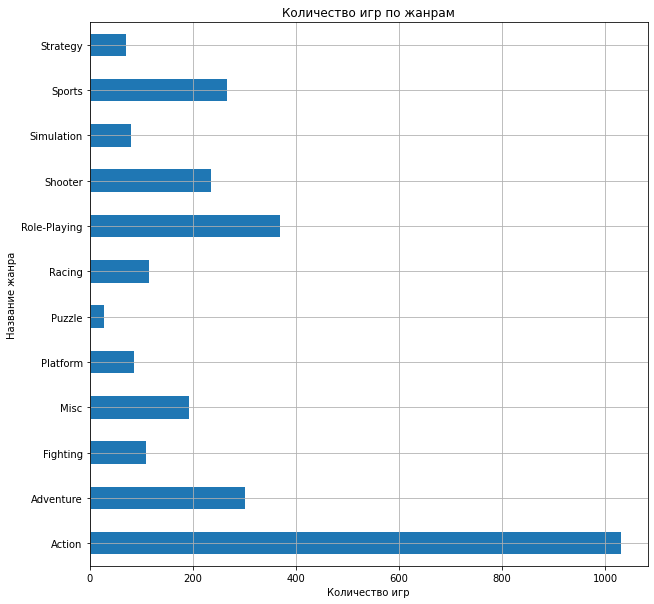

              name
count    12.000000
mean    240.416667
std     270.588066
min      28.000000
25%      83.750000
50%     153.500000
75%     275.750000
max    1031.000000


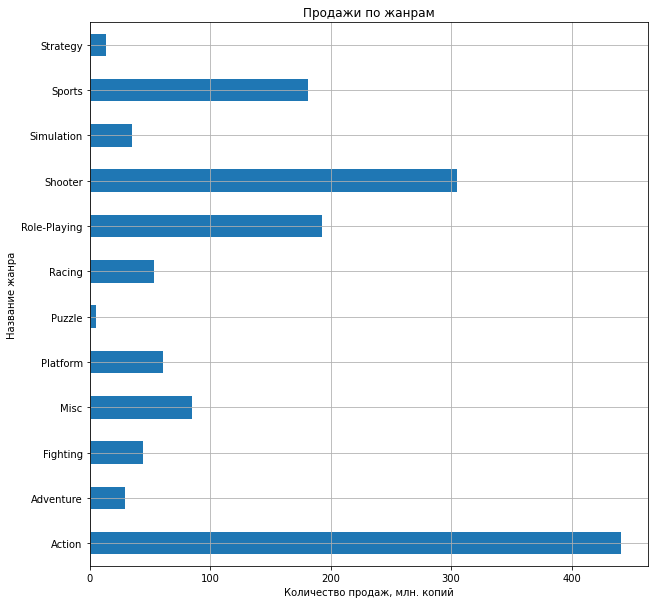

       total_sales
count    12.000000
mean    120.543333
std     135.220112
min       4.890000
25%      33.697500
50%      57.250000
75%     183.995000
max     441.120000


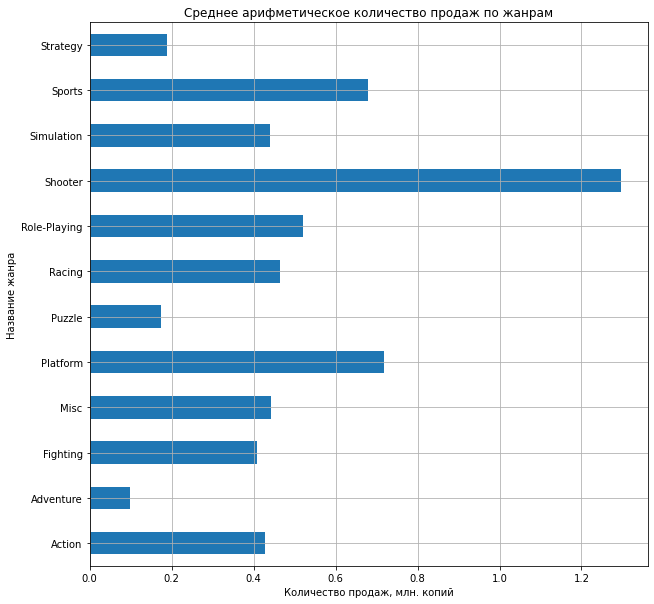

       total_sales
count    12.000000
mean      0.488060
std       0.316191
min       0.097450
25%       0.353096
50%       0.440958
75%       0.560343
max       1.296723


In [49]:
barh_genre('name', 'Количество игр', 'count', 'Количество игр по жанрам')
barh_genre('total_sales', 'Количество продаж, млн. копий', 'sum', 'Продажи по жанрам')
barh_genre('total_sales', 'Количество продаж, млн. копий', 'mean', 'Среднее арифметическое количество продаж по жанрам')

__Вывод:__ видим, что самым популярным по количеству выпущенных игр жанром является `Action`, за ним следуют `Role-Playing` и `Adventure`, наименее популярный - `Puzzle`.

Самым популярным по продажам жанром также является `Action`, за ним следуют `Shooter` и `Role-Playing`, наименее популярный - `Puzzle`.

Самым прибыльным жанром является `Shooter`, за ним следуют `Platform` и `Sport`, наименее прибыльным - `Adventure`.

### Шаг 4. Составим портрет пользователя каждого региона

#### Самые популярные платформы для пользователей каждого региона (NA, EU, JP)

In [51]:
def pie_platform(x, title):
    platform_data = actual_data\
    .groupby('platform')[x]\
    .sum()\
    .sort_values(ascending=False)
    pie_data = platform_data[:5]
    pie_data.loc['other'] = platform_data.sum() - platform_data[:5].sum()
    pie_data.plot(kind='pie', y=x, autopct='%.0f%%', legend = None)
    plt.title(title)
    return plt.show()

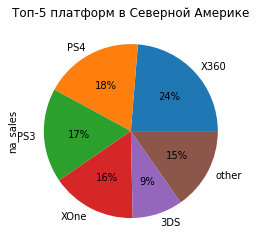

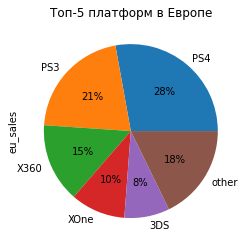

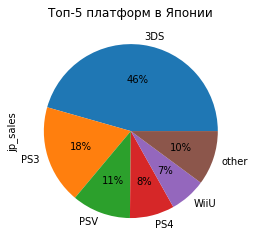

In [52]:
pie_platform('na_sales', 'Топ-5 платформ в Северной Америке')
pie_platform('eu_sales', 'Топ-5 платформ в Европе')
pie_platform('jp_sales', 'Топ-5 платформ в Японии')

__Вывод:__ видим, что в Северной Америке лидирует Xbox 360 (24%), что можно объяснить тем, что США являетя родным рынком для Microsoft. Далее идут PS4 (18%), PS3 (17%), Xbox One (16%) и Nintendo 3DS (9%). Между Microsoft и Sony практически паритет: 40% и 35% рынка, Nintendo занимет 9%, остальные платформы - 15%.

В Европе лидирует PS4 (28%), далее идут PS3 (21%), Xbox 360 (15%), Xbox One (10%), Nintendo 3DS (8%). Sony занимает почти половину рынка Европы (49%), Microsoft - четверть (25%), Nintendo занимет 8%, остальные платформы - 18%.

В Японии лидирует, занимая почти половину рынка, Nintendo 3DS (46%), далее идут PS3 (18%), PS Vita (11%), PS4 (8%), Nintendo Wii U (7%), остальные платформы - 10%. Nintendo занимает 53% рынка, Sony - 37%, Microsoft не вошла в топ-5. В Японии в отличии от других регионов большую популярность имеют портативные платформы (57% рынка).

#### Самые популярные жанры для пользователей каждого региона (NA, EU, JP)

In [54]:
def pie_genre(x, title):
    genre_data = actual_data\
    .groupby('genre')[x]\
    .sum()\
    .sort_values(ascending=False)
    pie_data = genre_data[:5]
    pie_data.loc['other'] = genre_data.sum() - genre_data[:5].sum()
    pie_data.plot(kind='pie', y=x, autopct='%.0f%%', legend = None)
    plt.title(title)
    return plt.show()

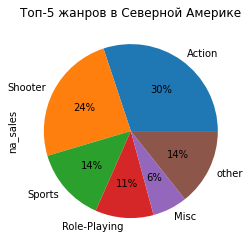

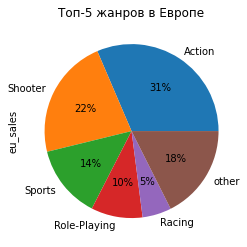

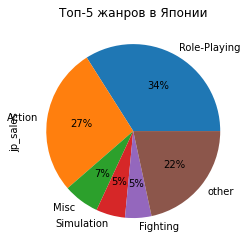

In [55]:
pie_genre('na_sales', 'Топ-5 жанров в Северной Америке')
pie_genre('eu_sales', 'Топ-5 жанров в Европе')
pie_genre('jp_sales', 'Топ-5 жанров в Японии')

__Вывод:__ видим, что в Северной Америке лидирует жанр Action (30%). Далее идут Shooter (24%), Sports (14%), Royal-Playing (11%) и Misc (6%), остальные жанры - 14%.

В Европе также лидирует жанр Action (31%). Далее идут Shooter (22%), Sports (14%), Royal-Playing (10%), Racing (5%) остальные жанры - 18%. Пользователи Северной Америки и Европы во многом похожи.

В Японии лидирует, занимая более трети рынка, жанр Royal-Playing (34%), далее идут Action (27%), Misc (7%), Simulation (5%), Fighting (5%), остальные платформы - 22%. Популярность жанра Royal-Playing связнана с большой популярностью портативных платформ в Японии.

#### Влияние рейтинг ESRB на продажи в отдельном регионе

Для оценки рейтинга ESRB нужно заполнить пустые значения.

In [56]:
actual_data['rating'].isna().sum()

1275

Категориям, которым не присвоен рейтинг, укажем рейтинг `not_rated`.

In [57]:
actual_data.loc[:, 'rating'] = actual_data.loc[:, 'rating'].fillna('not_rated')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [59]:
def pie_rating(x, title):
    actual_data\
    .pivot_table(index='rating', values=x, aggfunc='sum')\
    .sort_values(by=x, ascending=False)\
    .plot(kind='pie', y=x, autopct='%.0f%%', legend = None)
    plt.title(title)
    return plt.show()

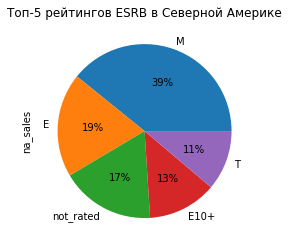

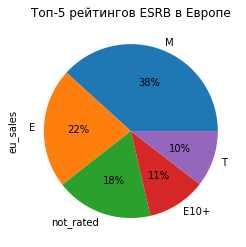

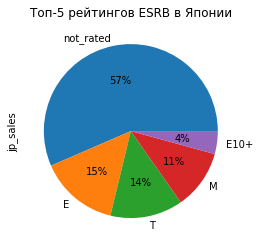

In [60]:
pie_rating('na_sales', 'Топ-5 рейтингов ESRB в Северной Америке')
pie_rating('eu_sales', 'Топ-5 рейтингов ESRB в Европе')
pie_rating('jp_sales', 'Топ-5 рейтингов ESRB в Японии')

__Вывод:__ видим, что в Северной Америке лидируют продажи игр с рейтингом М для лиц старше 17 лет (39%). Далее идут с рейтингом Е для всех возрастных категорий (19%), без рейтинга (17%), с рейтингом Е10+ для лиц старше 10 лет (13%) и с рейтингом Т для лиц старше 13 лет (11%).

В Европе также лидирует по продажам игр рейтинг М (38%). Далее - Е (22%), без рейтинга (18%), Е10+ (11%), T (10%). Продажи по рейтингам ESRB для Северной Америки и Европы практически идентичны и скорее отражают предпочтения пользователей, а не напрямую влияют на продажи.

В Японии не используется возрастной рейтинг ESRB, там действует рейтинг CERO, информации по которому у нас нет. Поэтому 57% проданных игр не имеют рейтинга ESRB, рейтинг Е - 15%, T - 14%, M - 11%, E10+ - 4%. Можно сделать вывод, что большая часть игр ориентирована на внутренний рынок Японии и не выходит за ее пределами (в противном случае для них имелся бы рейтинг ESRB).

### Шаг 5. Проверим гипотезы

#### Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Используем исходные данные: средние пользовательские рейтинги платформ Xbox One и PC. Но сначала избавимся от пропусков.

In [61]:
xone_user_score = actual_data.query('platform == "XOne"')['user_score'].dropna()

In [62]:
pc_user_score = actual_data.query('platform == "PC"')['user_score'].dropna()

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для этого применим специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind`.

In [63]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


__Вывод:__ полученное значение p-value (~0.55) больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports ~не равны~ равны.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports ~равны~ не равны.

In [64]:
action_user_score = actual_data.query('genre == "Action"')['user_score'].dropna()

sports_user_score = actual_data.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


In [65]:
print('Cредние пользовательские рейтинги Xbox One:', round(xone_user_score.mean(), 2))
print('Cредние пользовательские рейтинги PC:', round(pc_user_score.mean(), 2))

Cредние пользовательские рейтинги Xbox One: 6.52
Cредние пользовательские рейтинги PC: 6.43


In [66]:
print('Cредние пользовательские рейтинги жанра Action:', round(action_user_score.mean(), 2))
print('Cредние пользовательские рейтинги жанра Sports:', round(sports_user_score.mean(), 2))

Cредние пользовательские рейтинги жанра Action: 6.83
Cредние пользовательские рейтинги жанра Sports: 5.46


__Вывод:__ полученное значение p-value (~0.55) больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports равны.

Когда сравниваем средние двух генеральных совокупностей, нулевую гипотезу сформулируем так: «средние значения совокупностей равны». Альтернативную гипотезу сформулируем как: «средние значения совокупностей не равны» (двухсторонний t-тест). В действительности проверяем нулевую гипотезу о равенстве разности между двумя средними нулю, — это должно быть так, если они равны. Средние генеральных совокупностей, как и средние взятых из них выборок, могут различаться, но недостаточно сильно, чтобы сделать вывод о том, что эта разница неслучайна. На этот вопрос и отвечает статистический тест: достаточно ли большое различие мы наблюдаем с учетом разброса, чтобы отвергнуть нулевую гипотезу об их равенстве. В Python используется специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind`.

### Шаг 6. Общий вывод

Проведено исследование исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах, полученных из открытых источников.

Изучили общую информацию. Увидели, что в данных имеются пропуски и аномалии. Названия столбцов не приведены к нижнему регистру. 

Провели предобработку данных:
- привели названия столбцов к нижнему регистру.
- изменили тип данных в столбце `year_of_release` на `int`, предварительно удалив пропуски, и  `user_score` - на `float64`, предварительно заменив `tbd` на `NaN`.
- оставили пропуски в данных для столбцов `critic_score`, `user_score`, `rating`, т.к. удалив их мы потеряем до половины данных, а заменив на синтетические данные можем сильно исказить картину (адекватно восполнить эти данные нечем). Провели проверку на явные (отсутствуют) и неявные дубликаты (удалили). Посмотрели на аномальные значения в продажах, выбросы отсутствуют. Посчитали суммарные продажи во всех регионах и добавили их в отдельный столбец `total_sales`.

Провели исследовательский анализ данных:
- построили диаграмму количества выпускаемых игр по годам. Рост количества игр начался с 1994 года с пиком в 2008 году. Пик можно объяснить тем, что это переходный период, когда уже прошло пара лет с выхода следующего поколения приставок (PS3, Xbox360), но и предыдущее поколение (PS2, XBox) имеет все еще большую аудиторию.
- построили график продаж по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределения по годам. Жизненный цикл платформы составляет от 10 до 12 лет. При этом два поколения могут параллельно продаваться сроком от 4 лет (PS, PS2) до 6 лет (PS2, PS3).
    Старт продаж новой платформы обычно начинается перед Рождеством (для увеличения ажиотажа), поэтому на графиках мы видим небольшой первый год и увеличение продаж в последующие годы. Все представленные платформы уже завершили свой жизненный цикл.
- определили актуальный период с 2012 по 2016 годы, который поможет построить прогноз на 2017 год. Записали датафрейм с актуальными данными `actual_data`.
- построили график продаж по платформам для актуальных данных. По каждой платформе с наибольшими продажами построили распределения с суммарными продажами по годам. По графикам выбрали потенциально прибыльные платформы: `PS4`, `XOne`, `3DS`, `PS3`, `WiiU`.
- построили график "ящик с усами" по глобальным продажам игр в разбивке по потенциально прибыльным платформам:
    - по `PS4` видим, что максимальные продажи игры составили 14.63 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в даипазоне от 60 тыс. до 730 тыс. копий, медианное значение - 200 тыс. копий.
    - по `XOne` видим, что максимальные продажи игры составили 7.39 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в даипазоне от 67 тыс. до 750 тыс. копий, медианное значение - 240 тыс. копий.
    - по `3DS` видим, что максимальные продажи игры составили 14.6 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в даипазоне от 50 тыс. до 370 тыс. копий, медианное значение - 130 тыс. копий.
    - по `PS3` видим, что максимальные продажи игры составили 21.05 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в даипазоне от 60 тыс. до 645 тыс. копий, медианное значение - 615 тыс. копий.
    - по `WiiU` видим, что максимальные продажи игры составили 7.09 млн. копий, минимальные - 10 тыс. копий, в основном игры продаются в даипазоне от 82 тыс. до 560 тыс. копий, медианное значение - 235 тыс. копий.  
    Диапазон продаж игр находится на примерно одном уровне, за исключением 3DS: от 67 тыс. до 670 тыс. копий. У 3DS показатели ниже, потому что это портативная приставка. Максимальные продажи обеспечивают кроссплатформенные игры-бестселлеры и игры-эксклюзивы платформ, ради которых пользователи и выбирают эту платформу. Лидер продаж - `PS3`, но время `PS4` еще впереди, тогда как продажи `3DS` падают.
- на диаграмме рассеяния видим небольшую прямую корреляцию зависимости общих продаж от отзывов критиков, коэффициент Пирсона составляет 0.33. Зависимости общих продаж от отзывов пользователей практически нет, коэффициент Пирсона составляет -0.005. Можно сделать вывод, что критики наиболее точно оценивают игры, что подтверждается увеличением продаж.
- видим для других платформ такую же прямую корреляцию зависимости общих продаж от отзывов критиков: коэффициент Пирсона составляет от 0.32 до 0.42. Корреляция зависимости общих продаж от отзывов пользователей для платформ `PS4`, `Xone`, `X360` так же низкая: коэффициент Пирсона составляет от -0.07 до 0.01. Но для платформ `3DS` и `WiiU` корреляция зависимости общих продаж от отзывов пользователей выше, чем для PS3: коэффициент Пирсона составляет 0.2 и 0.4 соответственно. Пользователи `WiiU` наиболее точно оценивают игры, что подтверждается увеличением продаж.

Составили портрет пользователя каждого региона:
- самые популярные платформы для пользователей каждого региона (NA, EU, JP):
    - в Северной Америке лидирует Xbox 360 (24%). Это можно объяснить тем, что США являетя родным рынком для Microsoft. Далее идут PS4 (18%), PS3 (17%), Xbox One (16%) и Nintendo 3DS (9%). Между Microsoft и Sony практически паритет: 40% и 35% рынка, Nintendo занимет 9%, остальные платформы - 15%.
    - в Европе лидирует PS4 (28%), далее идут PS3 (21%), Xbox 360 (15%), Xbox One (10%), Nintendo 3DS (8%). Sony занимает почти половину рынка Европы (49%), Microsoft - четверть (25%), Nintendo занимет 8%, остальные платформы - 18%.
    - в Японии лидирует, занимая почти половину рынка, Nintendo 3DS (46%), далее идут PS3 (18%), PS Vita (11%), PS4 (8%), Nintendo Wii U (7%), остальные платформы - 10%. Nintendo занимает 53% рынка, Sony - 37%, Microsoft не вошла в топ-5. В Японии в отличии от других регионов большую популярность имеют портативные платформы (57% рынка).
- самые популярные жанры для пользователей каждого региона (NA, EU, JP):
    - в Северной Америке лидирует жанр Action (30%). Далее идут Shooter (24%), Sports (14%), Royal-Playing (11%) и Misc (6%), остальные жанры - 14%.
    - в Европе также лидирует жанр Action (31%). Далее идут Shooter (22%), Sports (14%), Royal-Playing (10%), Racing (5%) остальные жанры - 18%. Пользователи Северной Америки и Европы во многом похожи.
    - в Японии лидирует, занимая более трети рынка, жанр Royal-Playing (34%), далее идут Action (27%), Misc (7%), Simulation (5%), Fighting (5%), остальные платформы - 22%. Популярность жанра Royal-Playing связнана с большой популярностью портативных платформ в Японии.
- влияние рейтинг ESRB на продажи в отдельном регионе:
    - в Северной Америке лидируют продажи игр с рейтингом М для лиц старше 17 лет (39%). Далее идут с рейтингом Е для всех возрастных категорий (19%), без рейтинга (14%), с рейтингом Е10+ для лиц старше 10 лет (12%) и с рейтингом Т для лиц старше 13 лет (11%).
    - в Европе также лидирует по продажам игр рейтинг М (39%). Далее - Е (22%), без рейтинга (18%), Т (11%), Е10+ (10%). Продажи по рейтингам ESRB для Северной Америки и Европы практически идентичны и скорее отражают предпочтения пользователей, а не напрямую влияют на продажи.
    - в Японии не используется возрастной рейтинг ESRB, там действует рейтинг CERO, информации по которому у нас нет. Поэтому 57% проданных игр не имеют рейтинга ESRB, рейтинг Е - 15%, T - 13%, M - 11%, E10+ - 4%. Можно сделать вывод, что большая часть игр ориентирована на внутренний рынок Японии и не выходит за ее пределами (в противном случае для них имелся бы рейтинг ESRB).

Провели проверку гипотез:
- проверили гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Полученное значение p-value (~0.55) больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- проверили гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Полученное значение p-value (~0.55) больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports равны.
- когда сравниваем средние двух генеральных совокупностей, нулевую гипотезу сформулируем так: «средние значения совокупностей равны». Альтернативную гипотезу сформулируем как: «средние значения совокупностей не равны» (двухсторонний t-тест). В действительности проверяем нулевую гипотезу о равенстве разности между двумя средними нулю, — это должно быть так, если они равны. Средние генеральных совокупностей, как и средние взятых из них выборок, могут различаться, но недостаточно сильно, чтобы сделать вывод о том, что эта разница неслучайна. На этот вопрос и отвечает статистический тест: достаточно ли большое различие мы наблюдаем с учетом разброса, чтобы отвергнуть нулевую гипотезу об их равенстве. В Python используется специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind`.

По итогам исследования можем дать рекомендации рекламному отделу на какие игры тратить рекламный бюджет:
- платформы: PS4, Xbox One.
- жанр: Action.
- рейтинг ESRB: M для лиц старше 17 лет.
- регион: Северная Америка.
- стоит обращать внимание только на отзывы критиков.